# Lecture 2 calculations

In [1]:
import matplotlib.pyplot as plt
import sympy as sp
import numpy as np
import sys
sys.path.append('../../python/')
from egb351.sun import black_body_spectral_radiance
from egb351.constants import σ
from egb351.math import cosd, sind
from CoolProp.CoolProp import PropsSI 

ModuleNotFoundError: No module named 'ipywidgets'

## Solar water heater example 

Heat flux to water: 515.50 (W/m^2)
eta =  0.69


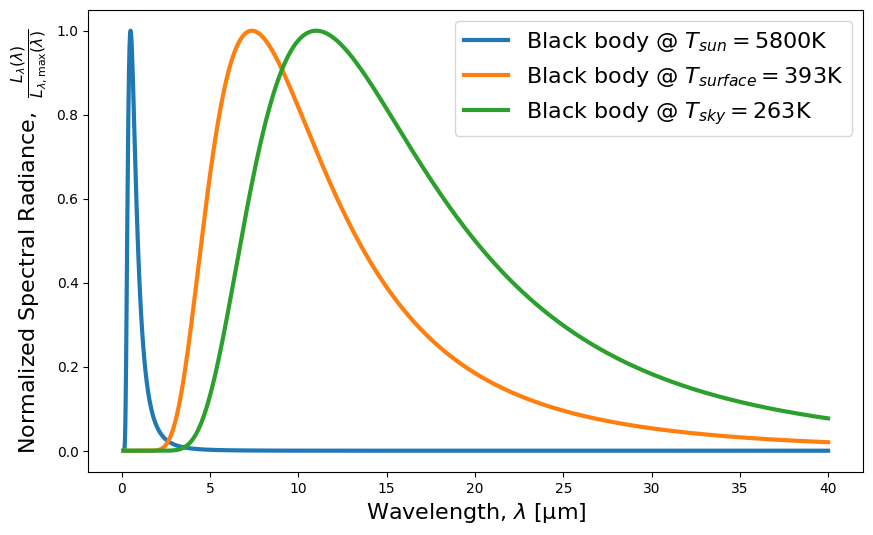

In [ ]:
T_sun = 5800.0 #K
T_surf = 120+273.15
T_sky = -10+273.15 
T_inf = 30+273.15
ε = 0.1
α_solar = 0.95
α_sky = ε
G_solar = 750 #W/m2

λ = np.arange(0.1,40,0.01) # [µm]
L_sun =  black_body_spectral_radiance(λ,T_sun,)
L_surf = black_body_spectral_radiance(λ,T_surf)
L_sky = black_body_spectral_radiance(λ,T_sky)

fig,ax = plt.subplots(figsize=(10,6))
ax.plot(λ,L_sun/L_sun.max(),label=r'Black body @ $T_{sun}=$5800K',linewidth=3,)
ax.plot(λ,L_surf/L_surf.max(),label=r'Black body @ $ T_{surface}=$393K',linewidth=3)
ax.plot(λ,L_sky/L_sky.max(),label=r'Black body @ $T_{sky}=$263K',linewidth=3)
ax.legend(fontsize=16)
ax.set_xlabel(r'Wavelength, $\lambda$ [µm]',fontsize=16)
ax.set_ylabel(r'Normalized Spectral Radiance,  $\frac{ L_{\lambda}(\lambda)}{L_{\lambda,\text{max}}(\lambda)}$',fontsize=16)
# ax.set_ylim((0,2200))

q_water = α_solar * G_solar + α_sky*σ*T_sky**4 - 0.22*(T_surf-T_inf)**(4/3)-ε*σ*T_surf**4
η = q_water/G_solar
print(f'Heat flux to water: {q_water:.2f} (W/m^2)')
print(f'eta =  {η:.2f}')

## Two-surface enclosure

In [ ]:
J1,J2 = sp.symbols('J1 J2')
ε1,ε2 = sp.symbols('ε1 ε2')
A1,A2 = sp.symbols('A1 A2')
T1,T2 = sp.symbols('T1 T2')
F12 = sp.symbols('F12')
σ=sp.symbols('σ')

sols = sp.solve( [  (ε1*A1)*(σ*T1**4 - J1)/(1-ε1) - A1*F12*(J1-J2),
                    (ε2*A2)*(σ*T2**4 - J2)/(1-ε2) + A1*F12*(J1-J2)],[J1,J2],dict=True)

In [ ]:
q1 = (σ*T1**4-sols[0][J1])/( (1-ε1)/(ε1*A1) )
q1.simplify()

A1*A2*F12*ε1*ε2*σ*(-T1**4 + T2**4)/(A1*F12*ε1*ε2 - A1*F12*ε1 + A2*F12*ε1*ε2 - A2*F12*ε2 - A2*ε1*ε2)

In [ ]:
T1 = 273.15+15
P1 = 0.1e6
P2 = 1.0e6
T_max = 1100 + 273.15
Cp0 = PropsSI('CPMASS','T',300,'P',1e3,'Air')
Cv0 = PropsSI('CVMASS','T',300,'P',1e3,'Air')
k = Cp0/Cv0

# compressor
T2 = T1 * (P2/P1)**((k-1)/k)
h1 = PropsSI('H','T',T1,'P',P1,'Air')
h2 = PropsSI('H','T',T2,'P',P2,'Air')
w_compressor =  (h2-h1)/1e3

# turbine
T4 = T_max * (P2/P1)**(-(k-1)/k)
h3 = PropsSI('H','T',T_max,'P',P2,'Air')
h4 = PropsSI('H','T',T4,'P',P1,'Air')
w_turbine =  (h3-h4)/1e3
w_net = w_turbine-w_compressor

# combustor
cp = PropsSI('CPMASS','T',T2,'P',1e6,'Air')
qH = cp*(T_max-T2)
qH/=1e3

# heat rejection
cp = PropsSI('CPMASS','T',T4,'P',0.1,'Air')
qL = cp*(T4-T1)
qL/=1e3

η_thermal = w_net/qH

## Black body 

Text(0, 0.5, 'Normalzed Spectral Radiance, $\\frac{ L_{\\lambda,b}(\\lambda)}{L_{\\lambda,b,\\text{max}}(\\lambda)}$')

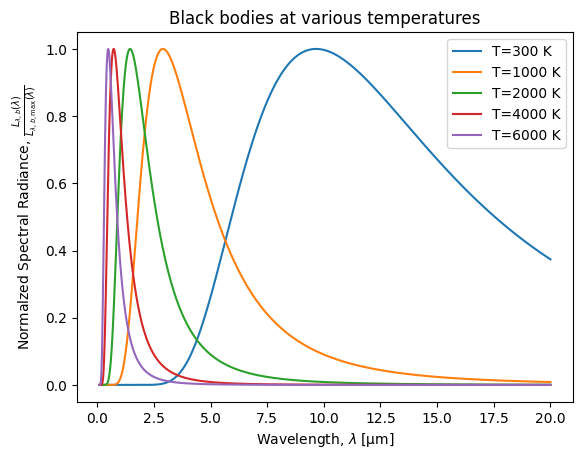

In [ ]:
fig,ax = plt.subplots()
λ = np.linspace(0.1,20,1000)
for T in [300,1000,2000,4000,6000]:
    L = black_body_spectral_radiance(λ,T,display_eqn=False)
    ax.plot(λ,L/L.max(),label=f'T={T} K')
    
ax.set_title('Black bodies at various temperatures')
ax.legend()
ax.set_xlabel(r'Wavelength, $\lambda$ [µm]')
ax.set_ylabel(r'Normalzed Spectral Radiance, $\frac{ L_{\lambda,b}(\lambda)}{L_{\lambda,b,\text{max}}(\lambda)}$')


## Example 3

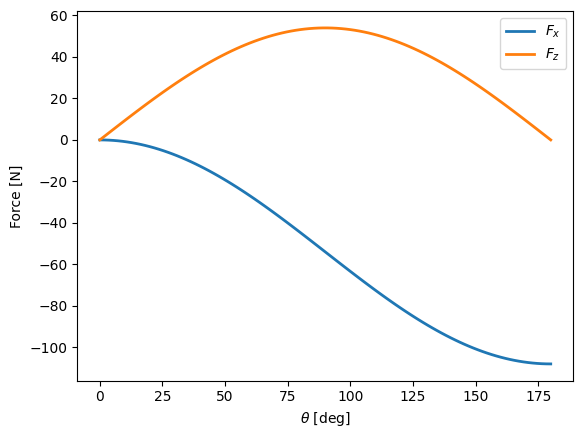

In [ ]:
ρ = 1000
v1 = 3
A1 = 0.006
θ = np.linspace(0,180,100)
Fx = ρ*A1*v1**2*(cosd(θ)-1)
Fz = ρ*A1*v1**2*sind(θ)

fig,ax = plt.subplots()
ax.plot(θ,Fx,label=r'$F_x$',linewidth=2)
ax.plot(θ,Fz,label=r'$F_z$',linewidth=2)
ax.set_xlabel(r'$\theta$ [deg]')
ax.set_ylabel(r'Force [N]')
ax.set_xlim(
ax.legend()

# References



